### Batches, Batch Normalization and Dropout

In this workbook you can experiment what you learnt about how to make batches out of your data, how to perform batch normalization and dropout

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import torch
from torch import nn
from sklearn.model_selection import train_test_split

Load the data from data/batches_norm_drop.csv, then take a look at them.

In [93]:
df = pd.read_csv('data/batches_norm_drop.csv', header = None)
df

,0,1,2
0,0.350140,4.248592,0
1,0.950728,3.528855,0
2,1.371517,3.149416,0
3,0.268221,4.337209,0
4,1.881996,1.515387,0
...,...,...,...
745,-3.425455,3.349783,2
746,-1.513002,2.789840,2
747,-1.070356,3.484981,2
748,-2.970848,3.443924,2


In [94]:
df[2].unique()

array([0, 1, 2], dtype=int64)

In [95]:
X = np.array(df.drop([2], axis=1))
y = np.array(df[2])

In [96]:
print("Shape of X:",X.shape)
print(X)

Shape of X: (750, 2)
[[ 0.35014034  4.24859167]
 [ 0.95072765  3.52885487]
 [ 1.37151689  3.1494165 ]
 ...
 [-1.07035566  3.48498144]
 [-2.97084772  3.44392411]
 [-2.57569525  2.14073863]]


Now you are ready to code your own function to create batches. If needed rewatch the video we provided in Eduflow.

**Extra challange:**    Are you able to split between train and test _**without**_ using sklearn?

### Without train test split

In [97]:
n_train = math.floor(0.8 * X.shape[0])
n_test = math.ceil((1 - 0.8) * X.shape[0])
X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]
y_test = y[n_train:]
print("Total Number of rows in train:",X_train.shape[0])
print("Total Number of rows in test:",X_test.shape[0])

Total Number of rows in train: 600
Total Number of rows in test: 150


In [98]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((600, 2), (150, 2), (600,), (150,))

### With train test split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(675, 2) (75, 2) (675,) (75,)


### Convert numpy to tensor

In [100]:
X_train = torch.tensor(X_train.astype(np.float32))
X_test = torch.tensor(X_test.astype(np.float32))

y_train = torch.tensor(y_train.astype(np.float32))
y_test = torch.tensor(y_test.astype(np.float32))

### Batchify

In [101]:

batch_size = 15


n_batches = X_train.shape[0] // batch_size  
n_batches_test = X_test.shape[0] // batch_size
#print(n_batches)


indexes = np.random.permutation(X_train.shape[0])
indexes_test = np.random.permutation(X_test.shape[0])
#print(indexes)


X_train = X_train[indexes]
y_train = y_train[indexes]

X_test = X_test[indexes_test]
y_test = y_test[indexes_test]



X_train = X_train[ :batch_size * n_batches ].reshape(n_batches, batch_size, X_train.shape[1])
y_train = y_train[ :batch_size * n_batches ].reshape(n_batches, batch_size, 1)
#print(X_train)

X_test = X_test[ :batch_size * n_batches_test ].reshape(n_batches_test, batch_size, X_test.shape[1])
y_test = y_test[ :batch_size * n_batches_test ].reshape(n_batches_test, batch_size, 1)


    

It's time to create your model! Remember to include the new tricks you learnt (batch normalization and dropout)!

In [102]:
# Hyperparameters for our network
input_size   = X_train.shape[2]
hidden_sizes = [400, 200, 100]
output_size   = 1

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.BatchNorm1d(400),
                      nn.Dropout(0.4),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.BatchNorm1d(200),
                      nn.Dropout(0.2),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.BatchNorm1d(100),
                      nn.Dropout(0.1),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], output_size),
                      nn.Sigmoid()
                      
                      )                
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=400, bias=True)
  (1): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Dropout(p=0.4, inplace=False)
  (3): ReLU()
  (4): Linear(in_features=400, out_features=200, bias=True)
  (5): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Dropout(p=0.2, inplace=False)
  (7): ReLU()
  (8): Linear(in_features=200, out_features=100, bias=True)
  (9): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Dropout(p=0.1, inplace=False)
  (11): ReLU()
  (12): Linear(in_features=100, out_features=1, bias=True)
  (13): Sigmoid()
)


Train your model and evaluate it. **Extra challenge**: try to figure out how you can tell if batch norm and dropout are effective

In [103]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
criterion = nn.BCELoss()             
trainloss = []
testloss = []
num_epochs = 100


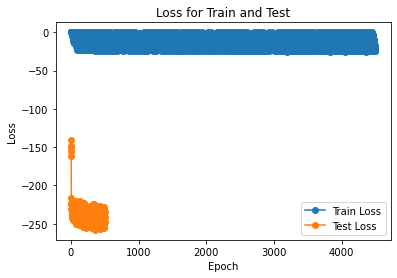

In [104]:
for epoch in range(num_epochs):

        running_loss = 0

        for X_train_batches, y_train_batches in zip(X_train, y_train):
            model.train()             
            y_pred = model(X_train_batches)
            loss = criterion(y_pred, y_train_batches)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            trainloss.append(running_loss / X_train.shape[0])

            
        
        # test
        model.eval()
        with torch.no_grad():

            test_epoch_list = []
        
            for X_test_batches, y_test_batches in zip(X_test, y_test):
                test_pred = model(X_test_batches)
                test_loss = criterion(test_pred, y_test_batches)
                running_loss += test_loss.item()
                testloss.append(running_loss / X_test.shape[0])
               
        

    #print(f'Epoch: {epoch + 1}, train loss: {trainloss:.2f}, test loss: {test_losses:.2f}')



# plot
plt.title("Loss for Train and Test")
plt.plot(trainloss, marker = 'o', label = 'Train Loss')
plt.plot(testloss, marker = 'o', label = 'Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()